In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# To check null values and file attributes and information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# To check numeric values count,mean,max and standard deviation

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Drop Unnamed Column 

In [6]:
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# To chanage weeklyStudyhours 

In [8]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 10","6 - 10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,6 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,6 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,6 - 10,76,78,75


# Gender Distribution 

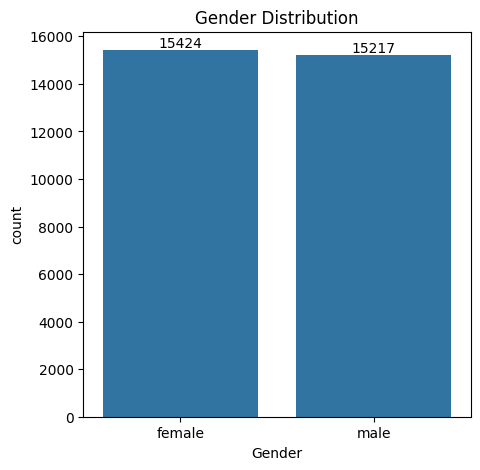

In [9]:
plt.figure(figsize = (5,5))
plt.title("Gender Distribution")

ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

# From above chart we analyzed that number of female students is graeter than the male students


# Now we use aggregate function group by parent education 

In [12]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"WritingScore":'mean',"ReadingScore":'mean'})
print(gb)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


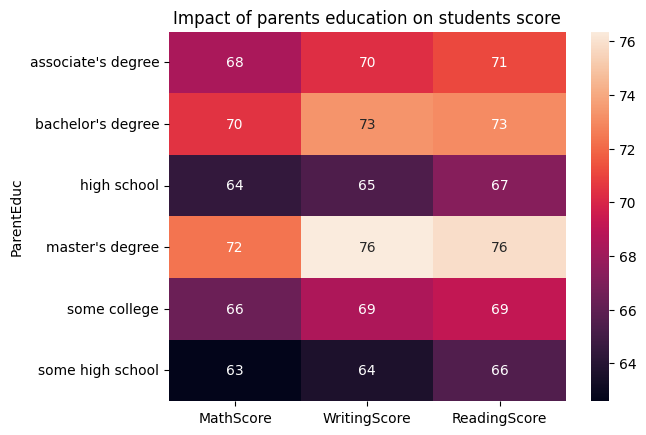

<Figure size 500x500 with 0 Axes>

In [15]:
plt.title("Impact of parents education on students score")
sns.heatmap(gb, annot=True)
plt.figure(figsize=(5,5))

plt.show()

# From the above chart we have concluded that there is a positive impact of parents education on the students (score/education)

In [17]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


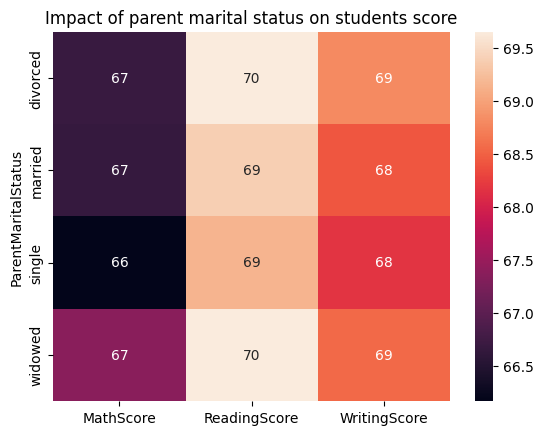

<Figure size 700x700 with 0 Axes>

In [24]:
plt.title("Impact of parent marital status on students score")

sns.heatmap(gb1 ,annot = True)
plt.figure(figsize=(7,7))
plt.show()

# From above chart we have concluded that there is negligible impact of parents marital status on students education and scores

# Checking Outliers

<Axes: xlabel='MathScore'>

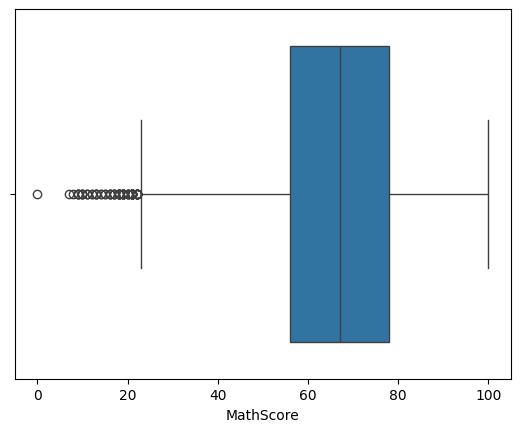

In [26]:
sns.boxplot(data = df, x = "MathScore")

# Outliers: The individual points plotted outside the whiskers are potential outliers. so mathscore has outliers.


<Axes: xlabel='ReadingScore'>

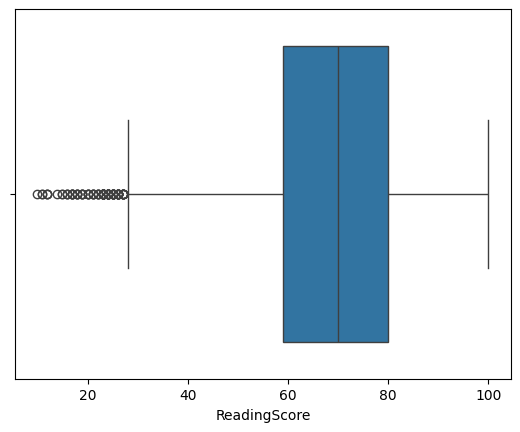

In [27]:
sns.boxplot(data = df ,x = "ReadingScore")


# From above chart we concluded that reading score has outilers less tahn math score.


<Axes: xlabel='WritingScore'>

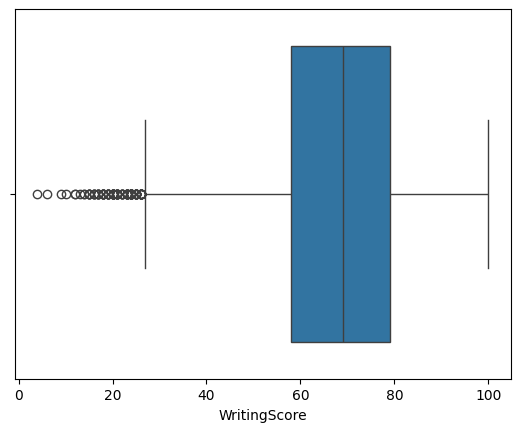

In [28]:
sns.boxplot(data = df, x = "WritingScore")

# From above chart we concluded that writing score has outliers 

# To check unique records of ethnic group

In [32]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

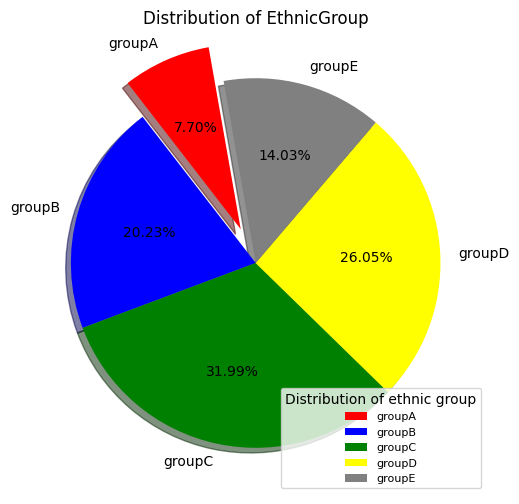

In [55]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

colors = ["red","blue","green","yellow","gray"]
l = ("groupA","groupB","groupC","groupD","groupE")
explode = [0.2,0,0,0,0]

plt.figure(figsize=(6,6))

mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.title("Distribution of EthnicGroup")
plt.pie(mlist ,labels = l ,shadow = True,autopct = "%1.2f%%",startangle = 100,explode = explode, colors = colors)
plt.legend(title ="Distribution of ethnic group",loc= "lower right",fontsize = 8 )
plt.show()

# From the above chart we have concluded that GroupC is the largest group with 31.99% population. 

# If we want to check that pie chart distribution is correct or not then we perform below operation. 

In [64]:
print(mlist)

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

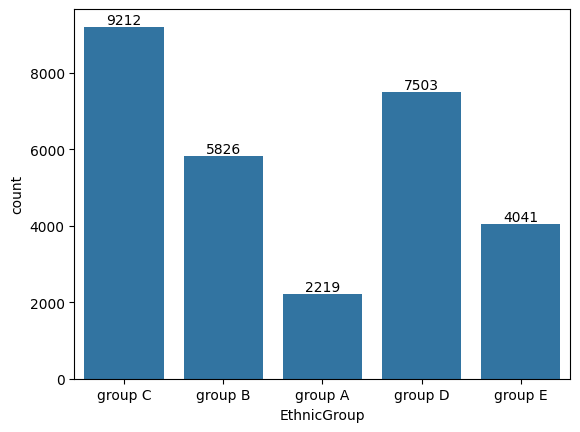

In [70]:

ab = sns.countplot(data = df ,x = "EthnicGroup")
ab.bar_label(ab.containers[0])

# From the above chart we have concluded that groupC has 9212 population and the largest group of Ethnic group and groupA has smallest group with 2219 population.

In [75]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,6 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,6 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,6 - 10,76,78,75


# Aggregation group By Weekly Study Hours 

In [76]:
gb2 = df.groupby("WklyStudyHours").agg({"MathScore":'mean',"WritingScore":"mean","ReadingScore":"mean"})

                MathScore  WritingScore  ReadingScore
WklyStudyHours                                       
6 - 10          66.870491     68.636280     69.660532
< 5             64.580359     67.090192     68.176135
> 10            68.696655     69.777778     70.365436


<Axes: ylabel='WklyStudyHours'>

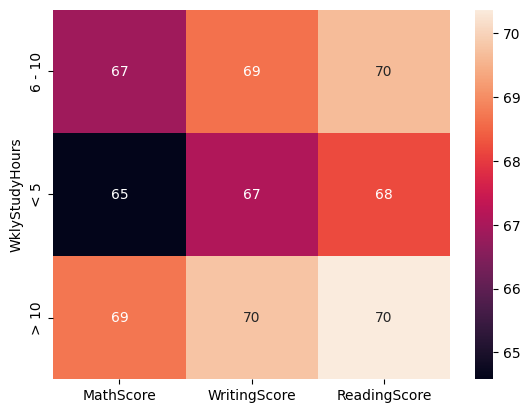

In [80]:
print(gb2)
sns.heatmap(gb2,annot = True)

# From the above chart we have concluded that the Weekly Study Hours has Positive impact on Students score.